# Table of Contents

In this notebook, you will learn:
- What is AutoEncoder?
- What is Variational AutoEncoder?
  - Understanding latent space and encoder/decoder network
- Implementing VAE in PyTorch

# What is AutoEncoder?

AutoEncoder has been fully explained in the previous notebook, So let's review:

An autoencoder is a type of neural network that learns to encode input data into a lower-dimensional representation and then decodes the representation back to its original form. The goal of an autoencoder is to learn a compressed representation of the input data while minimizing the reconstruction error between the original data and its reconstructed version.

The architecture of an autoencoder typically consists of an encoder network that maps the input data to a lower-dimensional representation, and a decoder network that maps the representation back to the original data space. The encoder and decoder networks are trained jointly using backpropagation to minimize the reconstruction error.

Autoencoders can be used for various tasks such as dimensionality reduction, feature extraction, and data denoising. One example of using autoencoders for **dimensionality reduction** is in image compression, where the encoder network compresses the high-dimensional image data into a lower-dimensional code, and the decoder network reconstructs the image from this code.

Another application of autoencoders is in **anomaly detection**, where the model is trained on normal data and then used to detect anomalies that deviate significantly from the learned distribution. Anomalies in the input data produce large errors in the reconstruction phase, making them easier to detect.

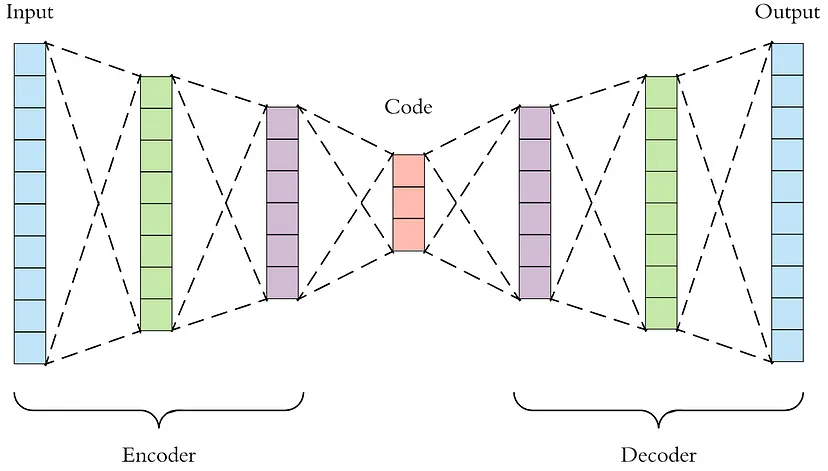

# What is a VAE?

Variational Autoencoder (VAE) is a generative model that learns the underlying latent space of the input data. It is a type of neural network architecture that consists of an encoder and a decoder network. The encoder network maps the input data to its corresponding latent space representation, while the decoder network maps the latent space representation back to the original input data. VAEs are used for various applications including image and text generation, anomaly detection, and data compression.

The main idea behind VAEs is to learn a lower-dimensional representation of the input data that captures its salient features and can be used to generate new samples. This is achieved through an encoder-decoder architecture, where the encoder maps the input data into a latent space, and the decoder maps the latent space back to the original input.

However, unlike traditional autoencoders, VAEs also parameterize a probability distribution over the latent space, allowing them to sample new points from the learned distribution. The encoder learns to map the input data to a mean vector and a variance vector that define a Gaussian distribution over the latent space. During training, the loss function encourages the distribution learned by the encoder to match a pre-defined prior distribution, typically a unit Gaussian.

Once the model has been trained, it can be used to generate new samples by sampling from the learned distribution in the latent space and then decoding the resulting vector back to the original input space.

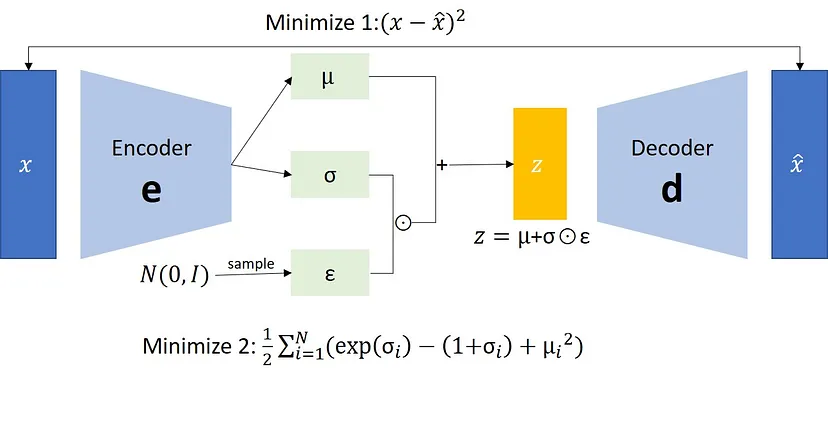

# Understanding VAE

## Latent Space

The goal of VAE is to learn the underlying distribution of the input data. This is achieved by mapping the input data to a lower-dimensional latent space where each point represents a unique feature of the input data. For example, if we have an image dataset, the latent space of the images would contain features like shape, texture, color, etc. The number of dimensions in the latent space is usually much less than the number of input dimensions, which helps in reducing the complexity of the model.

## Encoder Network

The encoder network takes in the input data and maps it to a point in the latent space. The output of the encoder is not a single point, but rather a probability distribution over the latent space. This distribution is usually modeled as a Gaussian distribution with mean and variance vectors:

```python
z_mean, z_log_var = encoder(x)
```

The `z_mean` vector represents the mean of the distribution, while `z_log_var` represents the log variance. We use log variance instead of variance to ensure that the variance is always positive. The mean and variance vectors are used to sample a point from the latent space as follows:

```python
z = z_mean + exp(z_log_var / 2) * epsilon
```

where `epsilon` is a random noise vector sampled from a standard normal distribution `N(0,1)`

## Decoder Network

The decoder network takes in a point from the latent space and maps it to the original input data. The output of the decoder is again a probability distribution over the input space, which is modeled as a Bernoulli distribution in the case of binary inputs or a Gaussian distribution in the case of continuous inputs:

```python
x_mean = decoder(z)
```

The `x_mean` vector represents the mean of the distribution over the input space.

## Loss Function

The loss function for VAE consists of two parts: the reconstruction loss and the KL divergence loss.

### Reconstruction Loss

The reconstruction loss measures how well the decoder is able to reconstruct the original input given a point in the latent space. This loss is usually calculated as the binary cross-entropy loss in the case of binary inputs or the mean squared error loss in the case of continuous inputs:

```
reconstruction_loss = binary_cross_entropy(x, x_mean)    # For binary inputs
reconstruction_loss = MSELoss(x, x_mean)                 # For continuous inputs
```

### KL Divergence Loss

The KL divergence loss measures how closely the distribution over the latent space matches a standard normal distribution. This loss encourages the encoder to learn a distribution over the latent space that is close to a standard normal distribution, which helps in regularizing the model and avoiding overfitting. The KL divergence loss is given by:

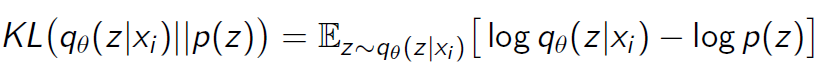

### Total Loss

The total loss is the sum of the reconstruction loss and the KL divergence loss:

```
total_loss = reconstruction_loss + kl_loss
```

# Implementation using PyTorch

First, we need to import the necessary libraries:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

Next, we define the hyperparameters for the VAE:

In [ ]:
latent_dim = 20
batch_size = 128
learning_rate = 1e-3
num_epochs = 30
num_samples = 16

latent_dim is the number of dimensions in the latent space, batch_size is the number of samples per batch, learning_rate is the learning rate for the optimizer, num_epochs is the number of epochs to train for, and num_samples is the number of samples to generate from the learned distribution.

We also need to define the transformations to be applied to the input images:

In [ ]:
transformations = transforms.Compose([
    transforms.ToTensor(),
])

These transformations convert the images to PyTorch tensors and normalize the pixel values to have 0 mean and 1 variance.

We will use the MNIST dataset for this example, which consists of grayscale images of handwritten digits. So, we load the MNIST dataset:

In [ ]:
train_dataset = datasets.MNIST(root='./dataset', train=True, transform=transformations, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 332408903.88it/s]

Extracting ./dataset/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 56185386.75it/s]


Extracting ./dataset/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 144880934.25it/s]

Extracting ./dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21947613.79it/s]


Extracting ./dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



In [ ]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

We create a DataLoader object with the specified batch size and shuffle the data randomly before each epoch.

Now, we can define the encoder and decoder networks for the VAE:



In [ ]:
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder, self).__init__()

    # Define the layers of the encoder network
    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
    self.fc_mu = nn.Linear(128*7*7, latent_dim)
    self.fc_logvar = nn.Linear(128*7*7, latent_dim)

    # Define the activation functions
    self.relu = nn.ReLU()
    
  def forward(self, x):
    # Encode the input image into a latent space representation
    x = self.relu(self.conv1(x))
    x = self.relu(self.conv2(x))
    x = self.relu(self.conv3(x))
    x = x.view(-1, 128*7*7)
    mu = self.fc_mu(x)
    logvar = self.fc_logvar(x)
    return mu, logvar

In [ ]:
class Decoder(nn.Module):
  def __init__(self):
    super(Decoder, self).__init__()

    # Define the layers of the decoder network
    self.fc1 = nn.Linear(latent_dim, 128*7*7)
    self.deconv1 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
    self.deconv2 = nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1)
    self.deconv3 = nn.ConvTranspose2d(32, 1, kernel_size=3, stride=1, padding=1)

    # Define the activation functions
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()
  def forward(self, z):
    # Decode the latent space representation into an output image
    z = self.relu(self.fc1(z))
    z = z.view(-1, 128, 7, 7)
    z = self.relu(self.deconv1(z))
    z = self.relu(self.deconv2(z))
    z = self.sigmoid(self.deconv3(z))
    return z



These networks define the encoder and decoder for the VAE. The encoder consists of three convolutional layers and two fully connected layers that output the mean and variance vectors for the Gaussian distribution over the latent space. The decoder consists of three transpose convolutional layers to map the latent space back to the original input space.



We also need to define the loss function for the VAE:

In [ ]:
def vae_loss(x, x_hat, mu, logvar):
  # Compute the reconstruction error
  reconstruction_error = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')

  # Compute the KL divergence between the learned distribution and a unit Gaussian
  kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

  # print(f'reconstruction_error={reconstruction_error}, kl_divergence={kl_divergence}')

  # Sum the two terms to form the overall VAE loss
  vae_loss = reconstruction_error + kl_divergence

  return vae_loss

This loss function computes the reconstruction error between the generated and original images as well as the KL divergence between the learned distribution and a unit Gaussian. The two terms are combined to form the overall VAE loss.

Here, we define `device` so we can use GPU for training.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

Finally, we can train the VAE:



In [ ]:
# Instantiate the encoder and decoder networks
encoder = Encoder().to(device)
decoder = Decoder().to(device)

# Set up the optimizer for the VAE
optimizer = optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=learning_rate)

train_losses = []

# Train the VAE
for epoch in range(num_epochs):
  for i, (x, _) in enumerate(train_loader):
    x = x.to(device)
    x = Variable(x)

    # Zero out the gradients
    optimizer.zero_grad()

    # Forward pass through the encoder and decoder networks
    mu, logvar = encoder(x)
    std = torch.exp(0.5*logvar)
    eps = torch.randn_like(std)
    z = eps*std + mu
    reconstruct_x = decoder(z)

    # Compute the VAE loss and backpropagate the gradients
    loss = vae_loss(x, reconstruct_x, mu, logvar)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Print the loss every 50 batches
    if (i+1) % 50 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(train_loader)}], Loss: {loss.data.item():.4f}')


Epoch [1/30], Batch [50/469], Loss: 27247.3691
Epoch [1/30], Batch [100/469], Loss: 23642.5605
Epoch [1/30], Batch [150/469], Loss: 18193.8516
Epoch [1/30], Batch [200/469], Loss: 17519.3633
Epoch [1/30], Batch [250/469], Loss: 15754.7383
Epoch [1/30], Batch [300/469], Loss: 15262.3604
Epoch [1/30], Batch [350/469], Loss: 14572.5986
Epoch [1/30], Batch [400/469], Loss: 14647.3242
Epoch [1/30], Batch [450/469], Loss: 14704.0020
Epoch [2/30], Batch [50/469], Loss: 13818.4023
Epoch [2/30], Batch [100/469], Loss: 14077.6621
Epoch [2/30], Batch [150/469], Loss: 13600.1660
Epoch [2/30], Batch [200/469], Loss: 13979.6504
Epoch [2/30], Batch [250/469], Loss: 13758.4766
Epoch [2/30], Batch [300/469], Loss: 13828.6445
Epoch [2/30], Batch [350/469], Loss: 13518.7188
Epoch [2/30], Batch [400/469], Loss: 13339.9434
Epoch [2/30], Batch [450/469], Loss: 13390.1553
Epoch [3/30], Batch [50/469], Loss: 14278.5410
Epoch [3/30], Batch [100/469], Loss: 13583.0781
Epoch [3/30], Batch [150/469], Loss: 13713.

This code trains the VAE on the MNIST dataset using the specified hyperparameters. We forward pass the input data through the encoder and decoder networks, compute the VAE loss, and backpropagate the gradients to update the weights of the networks. We also print the loss every 50 batches. After training is complete, we can generate some samples from the learned distribution:

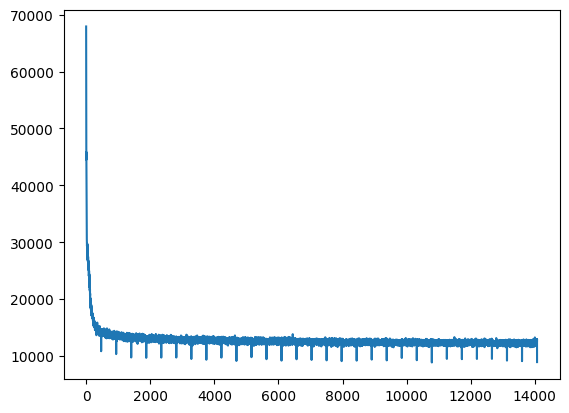

In [ ]:
plt.plot(train_losses)
plt.show()

In [ ]:
with torch.no_grad():
    z = torch.randn(num_samples, latent_dim).to(device)
    samples = decoder(z)

We sample num_samples vectors from a Gaussian distribution over the latent space and use the decoder network to decode them back into the original input space.

Then, we can visualize the generated samples. This code displays num_samples generated images in a grid:



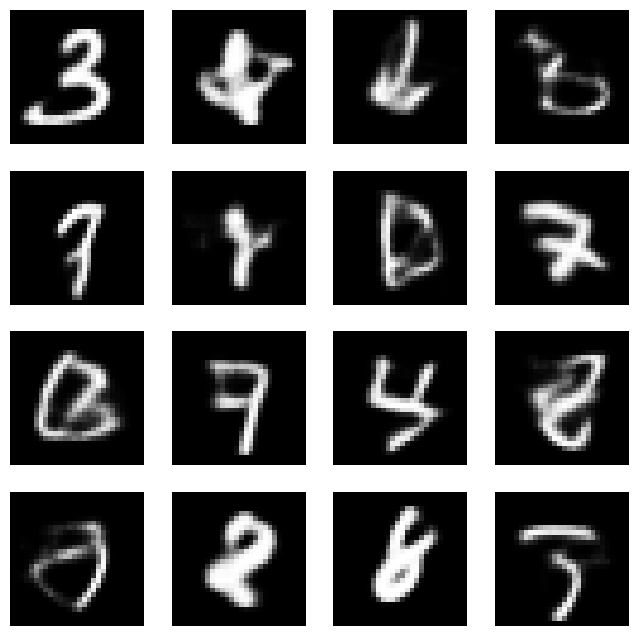

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
samples = torch.Tensor.cpu(samples)

for i, ax in enumerate(axes.flatten()):
    ax.imshow(samples[i].view(28, 28), cmap='gray')
    ax.axis('off')
plt.show()


These are some generates samples using the decoder part of VAE. As you can see they almost look like MNIST numbers. Therefore, that is how we can use VAE to generate new samples like our dataset.